In [111]:
import pandas as pd
import numpy as np

In [112]:
data = pd.read_csv('/content/student-mat.csv')

In [113]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


**Final Grade**

In [114]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


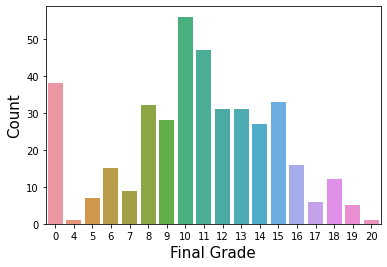

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
b = sns.countplot(data['G3'])
b.set_xlabel('Final Grade' , fontsize = 15)
b.set_ylabel('Count' , fontsize = 15)
plt.show()

In [116]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [117]:
data.shape

(395, 33)

**To Check any Null Value**

In [118]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

**Looking for total Male and Female Students**

In [119]:
male = len(data[data['sex'] == 'M'])
female = len(data[data['sex'] == 'F'])
print('Total Number of Male Students :',male)
print('Total Number of Male Students :',female)

Total Number of Male Students : 187
Total Number of Male Students : 208


**Looking for a Number of Students in different age group**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


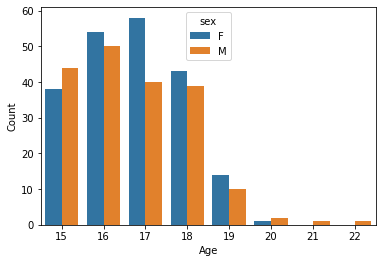

In [120]:
b = sns.countplot('age',hue = 'sex', data = data)
b.set_xlabel('Age' , fontsize = 10)
b.set_ylabel('Count', fontsize = 10)
plt.show()

**Looking for Urban and Rural Students**

In [121]:
urban = len(data[data['address'] == 'U'])
rural = len(data[data['address'] == 'R'])
print('Number of Urban Students:',urban)
print('Number of Rural Students:',rural)

Number of Urban Students: 307
Number of Rural Students: 88


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


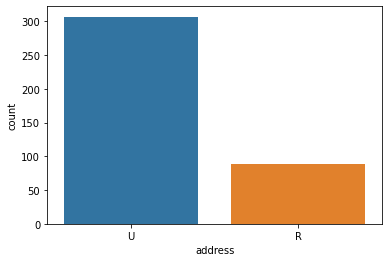

In [122]:
sns.countplot(data['address'])
plt.show()

**Find the Grade Average**

In [123]:
data['Avg'] = (data['G1']+data['G2']+data['G3'])/3

In [124]:
data['Avg'].head()

0     5.666667
1     5.333333
2     8.333333
3    14.666667
4     8.666667
Name: Avg, dtype: float64

Now lets create a grading based on its G Average

Above 90% = Grade A (1)

Between 70% & 90% = Grade B (2)

Below 70% = Grade C (3)

In [125]:
def find_grade(data):
  #create a list to store the data
  grades = []

  for row in data['Avg']:
    if row >= (0.9 * data['Avg'].max()):
      grades.append('1')
    elif row >= (0.7 * data['Avg'].max()):
      grades.append('2')
    elif row < (0.7 * data['Avg'].max()):
      grades.append('3')
  data['Avg'] = grades
  return data

In [126]:
final_data = find_grade(data)
final_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,3
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,3
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,2
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,3
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,3


Droping the Column Age and School

It is not useful for our Model(Removing StopWords)

In [127]:
final_data.drop(['age','school'], axis = 1 , inplace = True)

In [128]:
final_data.tail()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Avg
390,M,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,3
391,M,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,2
392,M,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,3
393,M,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,3
394,M,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9,3


In [129]:
final_data.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'Avg'],
      dtype='object')

**Classification(Changing to Categorical value) by mapping**

In [130]:
d = {'yes': 1,'no':0}
final_data['schoolsup'] = final_data['schoolsup'].map(d)
final_data['famsup'] = final_data['famsup'].map(d)
final_data['paid'] = final_data['paid'].map(d)
final_data['activities'] = final_data['activities'].map(d)
final_data['nursery'] = final_data['nursery'].map(d)
final_data['higher'] = final_data['higher'].map(d)
final_data['internet'] = final_data['internet'].map(d)
final_data['romantic'] = final_data['romantic'].map(d)

In [131]:
#mapping the sex data
d = {'F':1,'M':0}
final_data['sex'] = final_data['sex'].map(d)

# map the address data
d = {'U': 1, 'R': 0}
final_data['address'] = final_data['address'].map(d)

# map the family size data
d = {'LE3': 1, 'GT3': 0}
final_data['famsize'] = final_data['famsize'].map(d)

# map the parent's status
d= {'T': 1, 'A': 0}
final_data['Pstatus'] = final_data['Pstatus'].map(d)

# map the parent's job
d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
final_data['Mjob'] = final_data['Mjob'].map(d)
final_data['Fjob'] = final_data['Fjob'].map(d)

# map the reason data
d= {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
final_data['reason'] = final_data['reason'].map(d)

# map the guardian data
d = {'mother': 0, 'father': 1, 'other': 2}
final_data['guardian'] = final_data['guardian'].map(d)

In [132]:
final_data.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'Avg'],
      dtype='object')

**Supervised Algorithm for classification**

In [133]:
from sklearn.model_selection import train_test_split
x = final_data.drop('G3', axis = 1)  #Independent Var
y = final_data['G3']        #Dependent Var

In [134]:
final_data['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 44)

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
lr = LinearRegression()

In [138]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
y_pred = lr.predict(x_test)

In [140]:
lr.score(x_test,y_test)

0.8516317843828783

**85% model is working accuracy with new data.**

Inprogess = Data Normalization, Missing value treatment, Outlier analysis
